# Описание проекта

Необходимо подготовить прототип модели машинного обучения для компании «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

### Оглавление:
1. [Подготовка данных](#start)
2. [Анализ данных](#analysis)
3. [Модель](#model)

### Описание данных
Технологический процесс
* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    * Xanthate **— ксантогенат (промотер, или активатор флотации);
    * Sulphate — сульфат (на данном производстве сульфид натрия);
    * Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота

Параметры этапов
* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

### Наименование признаков
Наименование признаков следующее:

**[этап].[тип_параметра].[название_параметра]**

Пример: **rougher.input.feed_ag**

Возможные значения для блока **[этап]**:

* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Возможные значения для блока **[тип_параметра]**:
* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

# 1. Подготовка данных
<a id="start"></a>

### Открытие данных

In [1]:
!pip install --upgrade seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer


try:
    data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    data_full = pd.read_csv('/datasets/gold_recovery_full.csv')
except:
    data_train = pd.read_csv('gold_recovery_train.csv')
    data_test = pd.read_csv('gold_recovery_test.csv')
    data_full = pd.read_csv('gold_recovery_full.csv')
display(data_train.head())
display(data_test.head())
data_full.head()

Requirement already up-to-date: seaborn in c:\anaconda3\envs\practicum\lib\site-packages (0.11.1)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [2]:
print(f'Количество строк в data_train: {len(data_train)}')
print(f'Количество строк в data_test: {len(data_test)}')
print(f'Количество строк в data_full: {len(data_full)}')

Количество строк в data_train: 16860
Количество строк в data_test: 5856
Количество строк в data_full: 22716


Целевыми признаками будут являться:
* эффективность обогащения чернового концентрата **rougher.output.recovery**;
* эффективность обогащения финального концентрата **final.output.recovery**.

Целевые признаки отсутствуют в тестовой выборке, так же как и некоторые признаки, которые недоступны, потому что замеряются и/или рассчитываются значительно позже.

Признак date можно перенести в индекс строк.

In [3]:
data_train = data_train.set_index('date')
data_test = data_test.set_index('date')
data_full = data_full.set_index('date')

In [4]:
data_train.isna().sum().sort_values(ascending=False).head()

rougher.output.recovery              2573
rougher.output.tail_ag               2250
rougher.output.tail_sol              2249
rougher.output.tail_au               2249
secondary_cleaner.output.tail_sol    1986
dtype: int64

In [5]:
data_test.isna().sum().sort_values(ascending=False).head()

rougher.input.floatbank11_xanthate    353
primary_cleaner.input.sulfate         302
primary_cleaner.input.depressant      284
rougher.input.floatbank10_sulfate     257
primary_cleaner.input.xanthate        166
dtype: int64

In [6]:
data_full.isna().sum().sort_values(ascending=False).head()

rougher.output.recovery               3119
rougher.output.tail_ag                2737
rougher.output.tail_sol               2736
rougher.output.tail_au                2736
rougher.input.floatbank11_xanthate    2257
dtype: int64

В каждом наборе данных присутсвует досточно большое количество пропусков по признакам.

### Проверка правильности расчета эффективности обогащения

Вычислим эффективность обогащения на обучающей выборке для признака rougher.output.recovery. Затем найдём MAE между расчётами и значением признака. Для расчета избавимся от пропусков в data_train.

In [7]:
data_train_notna = data_train.dropna()
train_recovery = ((data_train_notna['rougher.output.concentrate_au'] * (data_train_notna['rougher.input.feed_au'] - data_train_notna['rougher.output.tail_au'])) / 
                  (data_train_notna['rougher.input.feed_au'] * (data_train_notna['rougher.output.concentrate_au'] - data_train_notna['rougher.output.tail_au']))) * 100
print(f'MAE между расчётами и значением признака rougher.output.recovery:', mean_absolute_error(data_train_notna['rougher.output.recovery'], train_recovery))

MAE между расчётами и значением признака rougher.output.recovery: 9.555596961987514e-15


Значение MAE стремится к нулю, следовательно можно сказать о том, что эффективность обогащения рассчитана правильно.

### Анализ признаков, недоступных в тестовой выборке.

Выведем список признаков, отсутствующих в тестовой выборке. Помимо двух целевых признаков **rougher.output.recovery** и **final.output.recovery** в тестовой выборке отсутсвуют:
* параметры расчётных характеристик флотации,
* параметры черновых концентратов и отвальных хвостов после флотации,
* параметры концентратов и отвальных хвостов после первичной очистки,
* параметры отвальных хвостов после вторичной очистки,
* параметры финальных концентратов и отвальных хвостов.

То есть отсутсвуют признаки, получаемые в ходе последующих расчётов и/или измерений.

In [8]:
data_train.columns.drop(data_test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

### Предобработка данных

Для предообратки данных из исходных данных введём целевые признаки в тестовую выборку.

In [9]:
data_test[['rougher.output.recovery', 'final.output.recovery']] = data_full[['rougher.output.recovery', 'final.output.recovery']]
data_test[['rougher.output.recovery', 'final.output.recovery']].head()

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078


В тренировочных данных следует оставить только те признаки, которые есть в тестовых, так как отсутствующие не получится испльзовать в модели. 

In [10]:
data_train = data_train[data_test.columns]
data_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016


Также в выборках удалим строки, в которых будут пропуски в целевых признаках.

In [11]:
data_train = data_train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])
data_test = data_test.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])
data_full = data_full.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])
print('Количество пропусков в целевых признаках в тренировочной выборке:')
display(data_train[['rougher.output.recovery', 'final.output.recovery']].isna().sum())
print('----------------------------------------------------------------')
print('Количество пропусков в целевых признаках в тестовой выборке:')
display(data_test[['rougher.output.recovery', 'final.output.recovery']].isna().sum())
print('----------------------------------------------------------------')
print('Количество пропусков в целевых признаках в исходных данных:')
data_full[['rougher.output.recovery', 'final.output.recovery']].isna().sum()

Количество пропусков в целевых признаках в тренировочной выборке:


rougher.output.recovery    0
final.output.recovery      0
dtype: int64

----------------------------------------------------------------
Количество пропусков в целевых признаках в тестовой выборке:


rougher.output.recovery    0
final.output.recovery      0
dtype: int64

----------------------------------------------------------------
Количество пропусков в целевых признаках в исходных данных:


rougher.output.recovery    0
final.output.recovery      0
dtype: int64

Оставшиеся пропуски заполним значениями соответствующих праметров, предшествующими по времени, так как соседние по времени параметры часто похожи.

In [12]:
data_train = data_train.ffill()
data_test = data_test.ffill()
data_full = data_full.ffill()
print('Количество пропусков во всех признаках в тренировочной выборке:')
display(data_train.isna().sum().sort_values(ascending=False).head())
print('----------------------------------------------------------------')
print('Количество пропусков во всех признаках в тестовой выборке:')
display(data_test.isna().sum().sort_values(ascending=False).head())
print('----------------------------------------------------------------')
print('Количество пропусков во всех признаках в исходных данных:')
data_full.isna().sum().sort_values(ascending=False).head()

Количество пропусков во всех признаках в тренировочной выборке:


final.output.recovery                0
rougher.input.feed_pb                0
rougher.state.floatbank10_b_air      0
rougher.state.floatbank10_a_level    0
rougher.state.floatbank10_a_air      0
dtype: int64

----------------------------------------------------------------
Количество пропусков во всех признаках в тестовой выборке:


final.output.recovery                0
rougher.input.feed_pb                0
rougher.state.floatbank10_b_air      0
rougher.state.floatbank10_a_level    0
rougher.state.floatbank10_a_air      0
dtype: int64

----------------------------------------------------------------
Количество пропусков во всех признаках в исходных данных:


secondary_cleaner.state.floatbank6_a_level            0
rougher.calculation.floatbank11_sulfate_to_au_feed    0
primary_cleaner.state.floatbank8_b_air                0
primary_cleaner.state.floatbank8_b_level              0
primary_cleaner.state.floatbank8_c_air                0
dtype: int64

# 2. Анализ данных
<a id="analysis"></a>

### Графики изменения концентрации

Построим графики изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

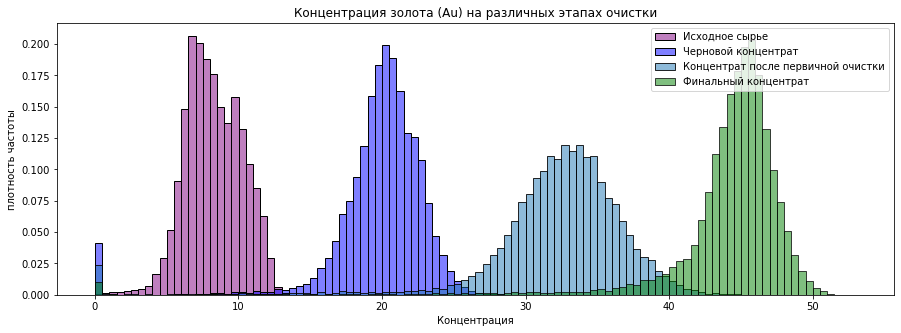

In [13]:
plt.figure(figsize=(15, 5))
sns.histplot(data_full['rougher.input.feed_au'], stat='density', alpha=0.5, binwidth=0.5, color='purple', label='Исходное сырье')
sns.histplot(data_full['rougher.output.concentrate_au'], stat='density', alpha=0.5, binwidth=0.5, color='blue', label='Черновой концентрат')
sns.histplot(data_full['primary_cleaner.output.concentrate_au'], stat='density', alpha=0.5, binwidth=0.5, label='Концентрат после первичной очистки')
sns.histplot(data_full['final.output.concentrate_au'], stat='density', alpha=0.5, binwidth=0.5, color='green', label='Финальный концентрат')
plt.legend(loc='upper right')
plt.title('Концентрация золота (Au) на различных этапах очистки')
plt.xlabel('Концентрация')
plt.ylabel('плотность частоты')
plt.show()

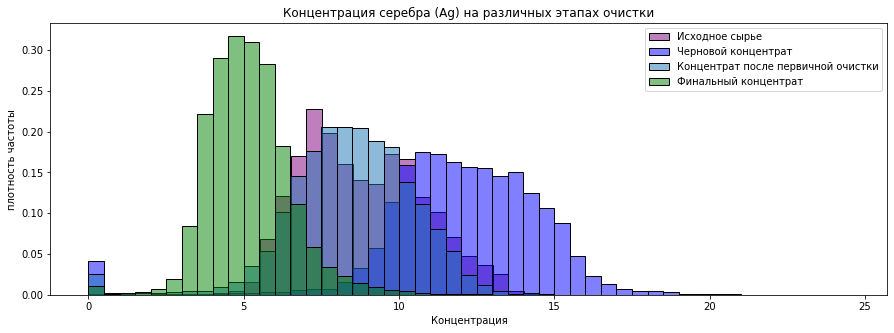

In [14]:
plt.figure(figsize=(15, 5))
sns.histplot(data_full['rougher.input.feed_ag'], stat='density', alpha=0.5, binwidth=0.5, color='purple', label='Исходное сырье')
sns.histplot(data_full['rougher.output.concentrate_ag'], stat='density', alpha=0.5, binwidth=0.5, color='blue', label='Черновой концентрат')
sns.histplot(data_full['primary_cleaner.output.concentrate_ag'], stat='density', alpha=0.5, binwidth=0.5, label='Концентрат после первичной очистки')
sns.histplot(data_full['final.output.concentrate_ag'], stat='density', alpha=0.5, binwidth=0.5, color='green', label='Финальный концентрат')
plt.legend(loc='upper right')
plt.title('Концентрация серебра (Ag) на различных этапах очистки')
plt.xlabel('Концентрация')
plt.ylabel('плотность частоты')
plt.show()

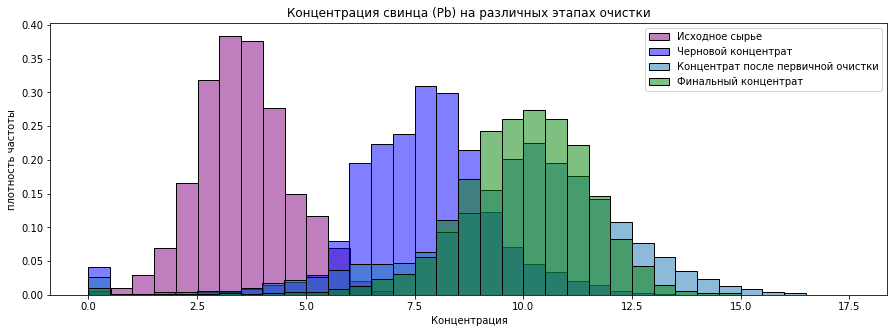

In [15]:
plt.figure(figsize=(15, 5))
sns.histplot(data_full['rougher.input.feed_pb'], stat='density', alpha=0.5, binwidth=0.5, color='purple', label='Исходное сырье')
sns.histplot(data_full['rougher.output.concentrate_pb'], stat='density', alpha=0.5, binwidth=0.5, color='blue', label='Черновой концентрат')
sns.histplot(data_full['primary_cleaner.output.concentrate_pb'], stat='density', alpha=0.5, binwidth=0.5, label='Концентрат после первичной очистки')
sns.histplot(data_full['final.output.concentrate_pb'], stat='density', alpha=0.5, binwidth=0.5, color='green', label='Финальный концентрат')
plt.legend(loc='upper right')
plt.title('Концентрация свинца (Pb) на различных этапах очистки')
plt.xlabel('Концентрация')
plt.ylabel('плотность частоты')
plt.show()

По графикам видно, что концентрация золота в сырье растёт с каждым этапом (как и должно быть). Концентрация серебра немного увеличилась после флотации, но затем с каждым этапом начала уменьшаться. Концентрация свинца увиличивалась после флотации и первичной очистки, но после вторичной очистки осталась на прежнем уровне. Кроме того, на каждом графике видны выбросы в виде нулевых значений концентрата для каждого этапа.

### Распределение размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. В целом они похожи, однако, в обучающей выборке размер гранул кажется чуть больше.

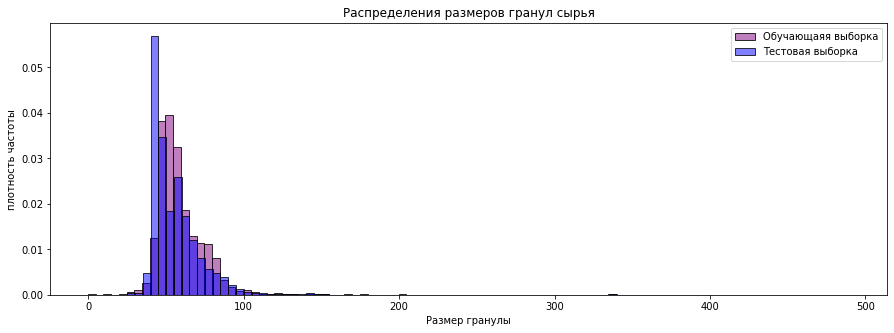

In [16]:
plt.figure(figsize=(15, 5))
sns.histplot(data_train['rougher.input.feed_size'], stat='density', alpha=0.5, binwidth=5, color='purple', label='Обучающаяя выборка')
sns.histplot(data_test['rougher.input.feed_size'], stat='density', alpha=0.5, binwidth=5, color='blue', label='Тестовая выборка')
plt.legend(loc='upper right')
plt.title('Распределения размеров гранул сырья')
plt.xlabel('Размер гранулы')
plt.ylabel('плотность частоты')
plt.show()

### Суммарная концентрация всех веществ

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

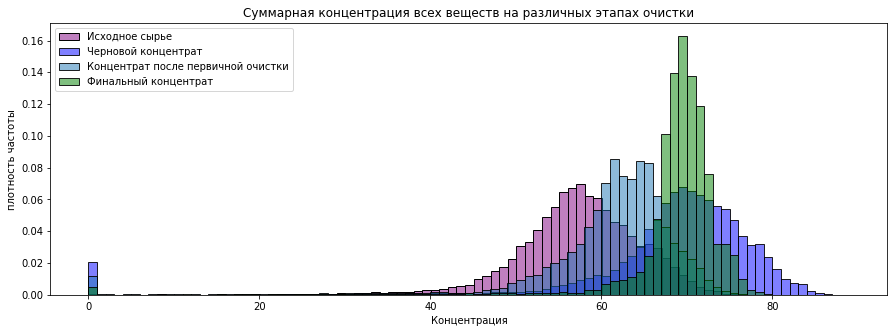

In [17]:
data_full_sum = pd.DataFrame()
data_full_sum['rougher.input.feed_sum'] = data_full['rougher.input.feed_au'] + data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb'] + data_full['rougher.input.feed_sol']
data_full_sum['rougher.output.concentrate_sum'] = data_full['rougher.output.concentrate_au'] + data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] + data_full['rougher.output.concentrate_sol']
data_full_sum['primary_cleaner.output.concentrate_sum'] = data_full['primary_cleaner.output.concentrate_au'] + data_full['primary_cleaner.output.concentrate_ag'] + data_full['primary_cleaner.output.concentrate_pb'] + data_full['primary_cleaner.output.concentrate_sol']
data_full_sum['final.output.concentrate_sum'] = data_full['final.output.concentrate_au'] + data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] + data_full['final.output.concentrate_sol']

plt.figure(figsize=(15, 5))
sns.histplot(data_full_sum['rougher.input.feed_sum'], stat='density', alpha=0.5, binwidth=1, color='purple', label='Исходное сырье')
sns.histplot(data_full_sum['rougher.output.concentrate_sum'], stat='density', alpha=0.5, binwidth=1, color='blue', label='Черновой концентрат')
sns.histplot(data_full_sum['primary_cleaner.output.concentrate_sum'], stat='density', alpha=0.5, binwidth=1, label='Концентрат после первичной очистки')
sns.histplot(data_full_sum['final.output.concentrate_sum'], stat='density', alpha=0.5, binwidth=1, color='green', label='Финальный концентрат')
plt.legend(loc='upper left')
plt.title('Суммарная концентрация всех веществ на различных этапах очистки')
plt.xlabel('Концентрация')
plt.ylabel('плотность частоты')
plt.show()

На каждом графике видны выбросы в виде нулевых значений концентрата для каждого этапа. Сложно сказать, чем это обусловлено, ошибка оборудования или же на очистку попало какое-то количество руды-"пустышки", но это аномалии, которые следует удалить, так как они не отображают реальной концентрации веществ на этапах.

In [18]:
index_zero = data_full_sum[(data_full_sum['rougher.input.feed_sum']==0) | (data_full_sum['rougher.output.concentrate_sum']==0) | (data_full_sum['primary_cleaner.output.concentrate_sum']==0) | (data_full_sum['final.output.concentrate_sum']==0)].index
data_train_zero = data_train.index.intersection(index_zero)
data_train = data_train.drop(data_train_zero)

data_test_zero = data_test.index.intersection(index_zero)
data_test = data_test.drop(data_test_zero)

# 3. Модель
<a id="model"></a>

### Подсчёт sMAPE

Напишем функцию для вычисления итоговой sMAPE.

In [19]:
def total_sMAPE(target, predict):
    sMAPE = np.sum(np.abs(target - predict) / ((np.abs(target) + np.abs(predict)) / 2)) / len(target) * 100
    total_sMAPE = 0.25 * sMAPE[0] + 0.75 * sMAPE[1]
    return total_sMAPE

### Обучение моделей

Разделим обучающую и тестовую выборки по признакам.

In [20]:
X_train, y_train = data_train.drop(columns=['rougher.output.recovery', 'final.output.recovery']), data_train[['rougher.output.recovery', 'final.output.recovery']]
X_test, y_test = data_test.drop(columns=['rougher.output.recovery', 'final.output.recovery']), data_test[['rougher.output.recovery', 'final.output.recovery']]

print(f'Размер обучающей выборки: {len(X_train)}')
print(f'Размер тестовой выборки: {len(X_test)}')

Размер обучающей выборки: 13725
Размер тестовой выборки: 5123


Построим модель линейной регрессии и проверим её на кросс-валидации.

In [21]:
sMAPE_score = make_scorer(total_sMAPE, greater_is_better = False)

model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, y_train)

sMAPE_lin_reg = np.mean(cross_validate(model_lin_reg, X_train, y_train, cv=3, scoring=sMAPE_score)['test_score'])

print(f'Значение итогового sMAPE линейной регрессии при проверке на кросс-валидации: {np.abs(sMAPE_lin_reg)}%')

Значение итогового sMAPE линейной регрессии при проверке на кросс-валидации: 12.66184662644487%


Построим модель случайного леса с подбором параметров через RandomizedSearch.

In [22]:
RS_params = {'max_depth': range(1, 10),
             'n_estimators': range(1, 50, 10)}

RS_random_forest = RandomizedSearchCV(RandomForestRegressor(random_state=1),
                                      param_distributions=RS_params,
                                      scoring=sMAPE_score, cv=3,
                                      n_iter=20, random_state=1)
RS_random_forest.fit(X_train, y_train)

sMAPE_random_forest = RS_random_forest.best_score_

In [23]:
print(f'Лучшее значение итогового sMAPE случайного леса: {np.abs(sMAPE_random_forest)}%')
print(f'Параметры модели случайного леса: {RS_random_forest.best_params_}')

Лучшее значение итогового sMAPE случайного леса: 9.984664747676478%
Параметры модели случайного леса: {'n_estimators': 41, 'max_depth': 4}


При проверке на кросс-валидации лучшее значение итогового sMAPE среди линейной регрессии и случайного леса показала модель случайного леса с глубиной 4 и количеством деревьев 41.

Проверим эту модель на тестовой выборке.

In [24]:
predictions = RS_random_forest.predict(X_test)
print(f'Значение итогового sMAPE случайного леса на тестовой выборке: {np.abs(total_sMAPE(y_test, predictions))}%')

Значение итогового sMAPE случайного леса на тестовой выборке: 7.476477080750266%


Сравним полученную модель с константной моделью, которая предсказывает медианные значения.

In [25]:
print(f'Значение итогового sMAPE константной модели с медианными значениями: {np.abs(total_sMAPE(y_test, y_train.median()))}%')

Значение итогового sMAPE константной модели с медианными значениями: 7.369167385832496%


### Выводы

Были обучены две модели для прогноза двух величин одновременно (эффективность обогащения чернового концентрата **rougher.output.recovery** и эффективность обогащения финального концентрата **final.output.recovery**) с помощью метрики sMAPE (симметричное среднее абсолютное процентное отклонение). При проверке на кросс-валидации линейная регрессия показала результат итоговой sMAPE в 12.66%, что хуже результата случайного леса, показавшего значение метрики в 9.98%. При проверке на тестовой выборке обученная модель показала ещё более лучший результат метрики sMAPE в 7.48%, однако это значение оказалось на 0,11% хуже, чем значение метрики константной модели, предсказывающей медианные значения.